In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
#os.chdir("/Users/evebenezra/desktop/PythonDirectory/89c19c54077b818ea69d314e74bb6fbf-27aba85593a688b47ec141d0d6e7f60a9e9d33a9")

In [2]:
# Grab and process the raw data.
df = pd.read_csv('amazon_cells_labelled.txt', sep="\t", header=None)
#sms_raw = pd.read_csv(reviews, delimiter= '\t', header=None)
df.columns = ['review', 'type']

#0 = bad review, 1 = good review 

df.head()

,review,type
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
#Set up the keywords

keywords = ["won\'t", 'refund', 'disappointed', 'horrible', 'not', 'hate', 'terrible', 'bad', "don\'t", 'died', 
            'wasted', 'waste', 'return', 'useless', 'died', 'dead', 'broke', 'broken', 'excessive', 
            'problem', 'unusable', "wouldn\'t", "couldn\'t", 'garbage']

#remove: worthless, misleading, unacceptable 

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
df['allcaps'] = df.review.str.isupper()

In [6]:
#This switches it so negative reviews are True, positive reviews are False

df['reviews'] = (df['type'] == 0)

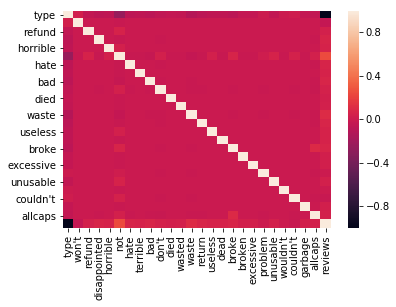

In [7]:
sns.heatmap(df.corr())

In [8]:
data = df[keywords + ['allcaps']]
target = df['reviews']

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print("Accuracy : {}%".format(
    bnb.score(data, target) * 100
))

Number of mislabeled points out of a total 1000 points : 372
Accuracy : 62.8%
